In [6]:
import pandas as pd
import yfinance as yf
import numpy as np
from stocktrends import Renko
import matplotlib.pyplot as plt
import pandas as pd
import tech_ind as ti
import copy
import risk_management_utils as erk
import data

## Defining Strategy
Def:-

### Fetching data

In [10]:
## list of tickers of Nifty30 stocks
stocks=['IOC.NS','RELIANCE.NS','TATAMOTORS.NS','BPCL.NS','HINDPETRO.NS','ONGC.NS','COALINDIA.NS','TCS.NS',
        'ICICIBANK.NS','TATASTEEL.NS','LT.NS','HINDALCO.NS','BHARTIARTL.NS','HDFCBANK.NS','M&M.NS','NTPC.NS',
        'VEDL.NS','INFY.NS','MARUTI.NS','HDFC.NS','WIPRO.NS','AXISBANK.NS','PNB.NS','JSWSTEEL.NS','BANKBARODA.NS',
        'GAIL.NS','CANBK.NS','HCLTECH.NS']
ohclv_data={}
for ticker in stocks:
    data.extract_data(ohclv_data,ticker=ticker,period='2y',interval='1wk')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [11]:
bse=data.extract_data(ohclv_data,period='2y',interval='1wk',add_to_data=False)
bse

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-15 00:00:00+05:30,51996.941406,52078.148438,50624.328125,50889.761719,50889.761719,46800
2021-02-22 00:00:00+05:30,50910.511719,51386.121094,48890.480469,49099.988281,49099.988281,133700
2021-03-01 00:00:00+05:30,49747.710938,51539.890625,49440.460938,50405.320312,50405.320312,92700
2021-03-08 00:00:00+05:30,50654.019531,51821.839844,50318.261719,50792.078125,50792.078125,47900
2021-03-15 00:00:00+05:30,50773.468750,50857.980469,48586.929688,49858.238281,49858.238281,47900
...,...,...,...,...,...,...
2023-01-23 00:00:00+05:30,60876.011719,61266.058594,58974.699219,59330.898438,59330.898438,37100
2023-01-30 00:00:00+05:30,59101.691406,60905.339844,58699.199219,60841.878906,60841.878906,65300
2023-02-06 00:00:00+05:30,60847.210938,60863.628906,60063.488281,60682.699219,60682.699219,48200


In [12]:
def CAGR(data,total_years=2):
    df=data.copy()
    df["week_ret"]=df["Close"].pct_change()
    CAGR = (1+df["week_ret"]).cumprod()-1
    return CAGR[len(CAGR)-1]

def sharpe_ratio(data,rf=0.03):
    df=data.copy()
    return (CAGR(df)-rf)/ti.annual_vol(df)

In [14]:
print("sensex 2 year return is {} %".format(100*CAGR(bse)))
print("sensex 2 year sharpe ratio is {}".format(sharpe_ratio(bse)))
print("sensex 2 year max drawdown is {} %".format(100*ti.max_drawdown(bse)))



sensex 2 year return is 19.87199045977084 %
sensex 2 year sharpe ratio is 0.516560071352473
sensex 2 year max drawdown is 16.22277686014229 %


In [15]:
tickers=ohclv_data.keys()
ohlc_week=copy.deepcopy(ohclv_data)
return_df=pd.DataFrame()
for ticker in tickers:
    print("calculating CAGR of {}....".format(ticker))
    ohlc_week[ticker]['week_ret']=ohlc_week[ticker]["Close"].pct_change()
    return_df[ticker]=ohlc_week[ticker]['week_ret']
return_df.dropna(inplace=True)
return_df*100

calculating CAGR of IOC.NS....
calculating CAGR of RELIANCE.NS....
calculating CAGR of TATAMOTORS.NS....
calculating CAGR of BPCL.NS....
calculating CAGR of HINDPETRO.NS....
calculating CAGR of ONGC.NS....
calculating CAGR of COALINDIA.NS....
calculating CAGR of TCS.NS....
calculating CAGR of ICICIBANK.NS....
calculating CAGR of TATASTEEL.NS....
calculating CAGR of LT.NS....
calculating CAGR of HINDALCO.NS....
calculating CAGR of BHARTIARTL.NS....
calculating CAGR of HDFCBANK.NS....
calculating CAGR of M&M.NS....
calculating CAGR of NTPC.NS....
calculating CAGR of VEDL.NS....
calculating CAGR of INFY.NS....
calculating CAGR of MARUTI.NS....
calculating CAGR of HDFC.NS....
calculating CAGR of WIPRO.NS....
calculating CAGR of AXISBANK.NS....
calculating CAGR of PNB.NS....
calculating CAGR of JSWSTEEL.NS....
calculating CAGR of BANKBARODA.NS....
calculating CAGR of GAIL.NS....
calculating CAGR of CANBK.NS....
calculating CAGR of HCLTECH.NS....


,IOC.NS,RELIANCE.NS,TATAMOTORS.NS,BPCL.NS,HINDPETRO.NS,ONGC.NS,COALINDIA.NS,TCS.NS,ICICIBANK.NS,TATASTEEL.NS,...,MARUTI.NS,HDFC.NS,WIPRO.NS,AXISBANK.NS,PNB.NS,JSWSTEEL.NS,BANKBARODA.NS,GAIL.NS,CANBK.NS,HCLTECH.NS
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-22 00:00:00+05:30,0.512562,0.264385,3.559405,4.616280,-0.635247,5.613703,9.299818,-5.779906,-4.214404,6.627404,...,-6.238565,-7.365124,-4.570304,-3.314885,-2.853747,-0.050545,-6.359644,-2.475930,-1.750002,-4.283535
2021-03-01 00:00:00+05:30,3.467612,4.453922,0.681214,2.656437,0.309342,3.558556,-0.722727,3.930138,1.957342,2.537933,...,5.575906,0.177207,2.571294,0.820918,2.080789,2.768993,-5.562061,3.772919,1.526723,3.524107
2021-03-08 00:00:00+05:30,-0.147854,-1.886439,-2.337385,-0.920312,-0.760687,0.087000,-0.397092,1.658879,0.557874,-1.820536,...,-2.107874,0.947368,1.033624,2.716384,-1.558757,3.038880,-4.091758,-0.203870,-1.629076,4.009559
2021-03-15 00:00:00+05:30,-2.517271,-2.601052,-2.708227,-5.376456,-2.734620,-3.954805,-9.435214,-0.253438,-4.275100,1.812626,...,0.244492,-1.415502,-3.457199,-3.244068,-6.333736,5.205967,-4.718813,-5.686073,-3.821656,-1.919835
2021-03-22 00:00:00+05:30,-7.949373,-4.195484,-4.062152,-2.021019,-2.108625,-7.330315,-4.915625,0.544230,-1.380727,4.618000,...,-4.626377,0.043454,-1.607797,-3.862305,-6.371913,1.055504,-4.002710,-4.837546,-3.211925,-0.197826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-23 00:00:00+05:30,-2.291920,-4.310884,10.529583,-2.829513,-4.717361,-2.605549,-2.026434,1.425766,-6.106735,-1.870675,...,3.527337,-2.004822,-1.265039,-6.103916,-10.798949,-2.710909,-12.322278,0.151517,-8.763133,0.704092
2023-01-30 00:00:00+05:30,-3.148152,-0.357246,-0.033661,-2.926750,-2.859580,-2.268873,-1.573741,2.088800,5.702395,-0.248656,...,2.343918,1.245535,2.474565,1.012873,1.968504,1.455604,4.038160,-6.404436,1.890034,2.738441
2023-02-06 00:00:00+05:30,1.720849,0.328463,0.089795,2.234462,2.284709,1.663197,-3.380536,1.586595,-1.151888,-9.597005,...,-1.464391,-0.220806,-0.514834,-1.739177,-1.061775,-1.762651,3.484106,3.286633,-0.876899,-2.661083


<AxesSubplot:xlabel='Date'>

<Figure size 1440x1440 with 0 Axes>

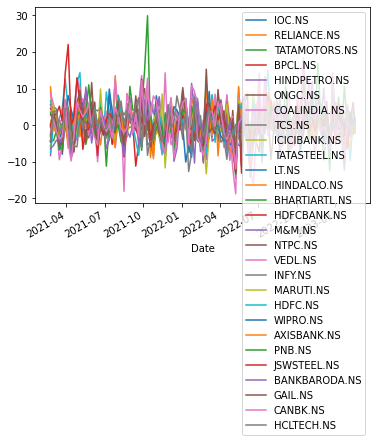

In [16]:
plt.figure(figsize=(20,20))
# plt.plot(100*return_df["IOC.NS"])
ret=return_df*100
ret.plot.line()

### defining strategy

In [17]:
def pflio(DF,m,x,print_port=False):
    """Returns cumulative portfolio return
    DF = dataframe with weekly return info for all stocks
    m = number of stock in the portfolio
    x = number of underperforming stocks to be removed from portfolio monthly"""
    df = DF.copy()
    portfolio = []
    weekly_ret = [0]
    for i in range(len(df)):
        if len(portfolio) > 0:
            monthly_ret.append(df[portfolio].iloc[i,:].mean())
            bad_stocks = df[portfolio].iloc[i,:].sort_values(ascending=True)[:x].index.values.tolist()
            portfolio = [t for t in portfolio if t not in bad_stocks]
        fill = m - len(portfolio)
        new_picks = df.iloc[i,:].sort_values(ascending=False)[:fill].index.values.tolist()
        portfolio = portfolio + new_picks
        if print_port==True: 
            print(portfolio)
    monthly_ret_df = pd.DataFrame(np.array(monthly_ret),columns=["week_ret"])
    return monthly_ret_df

In [40]:
# for i in range(14):
#     print(i+1,"-->",100*CAGR(pflio(return_df,15,i+1))," %")
def total_ret(ret):
    """returns the total return of the available data"""
    return_per_col=np.prod(ret+1)-1
    return return_per_col[len(return_per_col)-1]

In [67]:
A=pflio(return_df,14,5,print_port=False)
q=total_ret(A.shift(-1))
print("Total return :",100*q,"%")
print("Annual return :",100*((1+q)**(.5)-1),"%")

Total return : 58.05825969311928 %
Annual return : 25.721223225483804 %


In [65]:
m=14
annual_ret=[]
for i in range(m):
    A=pflio(return_df,m,i,print_port=False)
    q=total_ret(A.shift(-1))
    annual_ret.append(100*((1+q)**(.5)-1))

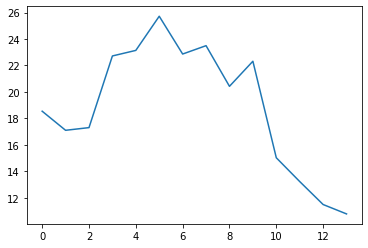

In [62]:
plt.plot(annual_ret)

In [34]:
return_df.iloc[20,:]

IOC.NS          -0.011184
RELIANCE.NS      0.019892
TATAMOTORS.NS    0.016161
BPCL.NS         -0.019479
HINDPETRO.NS    -0.038896
ONGC.NS         -0.009330
COALINDIA.NS    -0.007839
TCS.NS          -0.004161
ICICIBANK.NS     0.034062
TATASTEEL.NS     0.031549
LT.NS            0.079455
HINDALCO.NS      0.039610
BHARTIARTL.NS    0.009138
HDFCBANK.NS      0.013549
M&M.NS           0.010693
NTPC.NS          0.011036
VEDL.NS          0.003498
INFY.NS         -0.004767
MARUTI.NS       -0.016450
HDFC.NS          0.016203
WIPRO.NS         0.098802
AXISBANK.NS      0.031846
PNB.NS          -0.003659
JSWSTEEL.NS      0.032353
BANKBARODA.NS   -0.023311
GAIL.NS         -0.015970
CANBK.NS         0.000661
HCLTECH.NS       0.028817
Name: 2021-07-12 00:00:00+05:30, dtype: float64

In [35]:
return_df

,IOC.NS,RELIANCE.NS,TATAMOTORS.NS,BPCL.NS,HINDPETRO.NS,ONGC.NS,COALINDIA.NS,TCS.NS,ICICIBANK.NS,TATASTEEL.NS,...,MARUTI.NS,HDFC.NS,WIPRO.NS,AXISBANK.NS,PNB.NS,JSWSTEEL.NS,BANKBARODA.NS,GAIL.NS,CANBK.NS,HCLTECH.NS
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-22 00:00:00+05:30,0.005126,0.002644,0.035594,0.046163,-0.006352,0.056137,0.092998,-0.057799,-0.042144,0.066274,...,-0.062386,-0.073651,-0.045703,-0.033149,-0.028537,-0.000505,-0.063596,-0.024759,-0.017500,-0.042835
2021-03-01 00:00:00+05:30,0.034676,0.044539,0.006812,0.026564,0.003093,0.035586,-0.007227,0.039301,0.019573,0.025379,...,0.055759,0.001772,0.025713,0.008209,0.020808,0.027690,-0.055621,0.037729,0.015267,0.035241
2021-03-08 00:00:00+05:30,-0.001479,-0.018864,-0.023374,-0.009203,-0.007607,0.000870,-0.003971,0.016589,0.005579,-0.018205,...,-0.021079,0.009474,0.010336,0.027164,-0.015588,0.030389,-0.040918,-0.002039,-0.016291,0.040096
2021-03-15 00:00:00+05:30,-0.025173,-0.026011,-0.027082,-0.053765,-0.027346,-0.039548,-0.094352,-0.002534,-0.042751,0.018126,...,0.002445,-0.014155,-0.034572,-0.032441,-0.063337,0.052060,-0.047188,-0.056861,-0.038217,-0.019198
2021-03-22 00:00:00+05:30,-0.079494,-0.041955,-0.040622,-0.020210,-0.021086,-0.073303,-0.049156,0.005442,-0.013807,0.046180,...,-0.046264,0.000435,-0.016078,-0.038623,-0.063719,0.010555,-0.040027,-0.048375,-0.032119,-0.001978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-23 00:00:00+05:30,-0.022919,-0.043109,0.105296,-0.028295,-0.047174,-0.026055,-0.020264,0.014258,-0.061067,-0.018707,...,0.035273,-0.020048,-0.012650,-0.061039,-0.107989,-0.027109,-0.123223,0.001515,-0.087631,0.007041
2023-01-30 00:00:00+05:30,-0.031482,-0.003572,-0.000337,-0.029267,-0.028596,-0.022689,-0.015737,0.020888,0.057024,-0.002487,...,0.023439,0.012455,0.024746,0.010129,0.019685,0.014556,0.040382,-0.064044,0.018900,0.027384
2023-02-06 00:00:00+05:30,0.017208,0.003285,0.000898,0.022345,0.022847,0.016632,-0.033805,0.015866,-0.011519,-0.095970,...,-0.014644,-0.002208,-0.005148,-0.017392,-0.010618,-0.017627,0.034841,0.032866,-0.008769,-0.026611
